# Исследование успешности видеоигр

## План проекта

1. Изучение данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Портрет пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

Описание проекта
Для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры нужно выявить определяющие успешность игры закономерности. На основе полученных данных будет определен потенциально популярный продукт и спланирована рекламная кампания.

## 1. Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
games = pd.read_csv('/datasets/games.csv') 
games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Вывод

Выведена информация о данных. Выведены первые 5 значений переменных. В данных есть пропуски, об этом свидетельствует количество значений в переменных Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating. Несколько переменных нуждаются в изменении типа: Year_of_Release и Critic_Score с float64 на integer, т.к. в обоих случаях значения переменных - целые числа (годы, которые не могут быть дробными, и целые баллы) ; User_Score с object на float, т.к. оценка пользователей - это рейтинг, измеряемый от 0 до 10.


## 2. Предобработка данных

In [2]:
games = games.rename({'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 
                         'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales',
                         'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'}, axis = 1)
#games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приводим все буквы названий столбцов к строчным. Проверяем.

In [3]:
print(games.duplicated().sum())# проверка на дубли

0


Проверяем таблицу на дубли, дублей нет.

In [4]:
empty_names = games.drop(list(games['name'].dropna().index))
empty_names

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
games = games.dropna(subset = ['name'])# удаление строк с пропусками в переменной name
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


В переменной name есть пропущенные значения (2 шт.). Это игры платформы GEN, 1993 г. выхода. Т.к. имена игр нам восстановить не удастся, а также исходя из того, что игры старые, удаляем соответствующие строки из базы. Возможно, это были тестовые строки при заполнении информации об играх. Проверяем удаление.

In [6]:
empty_years = games.drop(list(games['year_of_release'].dropna().index))
empty_years.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14126,Housekeeping,DS,NaN,Action,0.00,0.00,0.04,0.00,NaN,NaN,NaN
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.00,26.0,2.7,T
7387,Move Fitness,PS3,NaN,Sports,0.00,0.16,0.00,0.05,NaN,NaN,NaN
6773,Mega Man X Collection,PS2,NaN,Misc,0.12,0.09,0.00,0.03,73.0,8.8,E


In [7]:
games['year_of_release'] = games.groupby('name')['year_of_release'].apply(lambda x: x.fillna(x.median()))
#games = games.dropna(subset = ['year_of_release'])# удаление строк с пропусками в переменной year_of_release
games.info()

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16567 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


In [8]:
print(games.loc[games['name']=='Call of Duty 3'])

                name platform  year_of_release    genre  na_sales  eu_sales  \
557   Call of Duty 3     X360           2006.0  Shooter      1.49      0.92   
719   Call of Duty 3      Wii           2006.0  Shooter      1.17      0.84   
1255  Call of Duty 3      PS3           2006.0  Shooter      0.60      0.62   
1915  Call of Duty 3      PS2           2006.0  Shooter      0.89      0.03   

      jp_sales  other_sales  critic_score user_score rating  
557       0.02         0.27          82.0        6.5      T  
719       0.00         0.23          69.0        6.7      T  
1255      0.03         0.26          80.0        6.9      T  
1915      0.00         0.15          82.0        7.4      T  


В переменной year_of_release есть пропущенные значения (269 шт.). Попытаемся найти аналогичные игры на других платформах и заполнить пропущенные значения годами выхода указанных игр. Проверяем, осталось 146 незаполненных значений.

In [9]:
games['year_of_release'] = games.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.median()))
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


Оставшиеся 146 пропущенных значений в переменной year_of_release заполним медианными значениями выхода игр для соответствующих платформ. Проверяем.

In [10]:
games['year_of_release'] = games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 2.2+ MB


Переводим переменную year_of_release из дробных в целочисленные. Проверяем.

In [11]:
games.loc[games['user_score']=='tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype(float)
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.2+ MB


Переменная user_score имеет тип object, но это рейтинг, который может быть дробным. Тип object присвоен из-за наличия в переменной значений tbd. Данное значение означает "to be determined", т.е. "подлежит определению". Для нас это означает, что рейтинга нет. Таким образом, заменяем значения tbd на NaN. Переменную user_score переводим в тип float (дробное число). Проверяем.
Переменную critic_score в тип целочисленных перевести не можем из-за наличия пропущенных данных.

In [12]:
print(games['rating'].value_counts())

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64


In [13]:
games.loc[games['rating']=='RP', 'rating'] = np.nan
games.loc[games['rating']=='K-A', 'rating'] = 'E'
print(games['rating'].value_counts())

E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64


In [14]:
games['rating'] = games['rating'].fillna('NR')
print(games['rating'].value_counts())

NR      6767
E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64


Изучим переменную rating. Наряду с действующими редакциями возрастных категорий организации ESRB, она содержит устаревшие значения (K-A) и значение RP (рейтинг ожидается). В первом случае присваиваем устаревшим значениям актуальные значения (Е), во втором случае, считаем, что рейтинга нет и заменяем RP на NaN.
Для дальнейшего иссмледования вводим новое значение переменной rating - NR (без рейтинга).Проверяем.

In [15]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38


Рассчитаем столбец суммарных продаж игр в мире как сумму продаж по каждому из имеющихся регионов. Проверяем.

Вывод

Была произведена чистка данных. Удалены данные, которые невозможно было восстановить. Изменены типы переменных. Рассчитан новый столбец суммарных продаж в мире. Указанный столбец является наиболее объективным показателем успешности игр: чем больше игра продается, тем она популярнее, несмотря на остальные рейтинги.
Пропуски в переменных critic_score, user_score и rating обусловлены тем, что не все игры становятся объектом внимания СМИ, экспертов и пользователей. Это происходят по разным причинам: отсутствие рекламы, игра ориентирована на маленький регион, игра является ремейком более популярной игры и т.п. 
Считаю, что заполнять переменные critic_score и user_score не имеет смысла, т.к. данные рейтинги достаточно субъективны, а мы получили более объективный рейтинг (суммарные продажи игр). 
Переменную rating заполнить корректно не возможно, т.к. для этого надо знать нюансы каждой игры. Поэтому ее тоже заполнять не будем.

## 3. Исследовательский анализ данных

Text(0, 0.5, 'Кол-во игр, шт.')

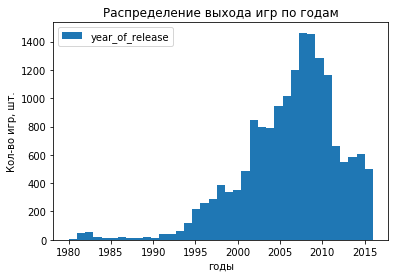

In [16]:
#games['year_of_release'].hist(bins=37, xlabel ='годы', ylabel='кол-во игр (шт.)')
games.plot(y='year_of_release', kind = 'hist', title = 'Распределение выхода игр по годам', bins=37)
plt.xlabel("годы")
plt.ylabel("Кол-во игр, шт.")

Рассмотрим распределение выхода игр по годам. Из построенной гистограммы видно, что основной "рывок" в производстве игр начался с 1995 г., когда годой выпуск игр превысил 200 шт.

Производство видеоигр с 2009 г. имеет тенденцию к снижению. С одной стороны, снижается конкуренция, с другой - за внимание пользователей в основном борятся крупные компании. Снижение продаж игр, скорее всего, обусловлено экономическим кризисом, начавшимся в 2008 г. В условиях кризиса многие потребители отказываются от излишеств (в данном случае это игры) или переходят на бесплатный или пиратский контент. Немаловажным фактором снижения спроса на видеоигры стали игры на телефонах и планшетах, которые также вытеснили значительный процент игр с рынка.

In [17]:
print(games.groupby('platform')['sum_sales'].sum().sort_values(ascending = False))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64


Рассмотрим продажи игр а зависимости от игровой платформы. Наиболее крупные продажи игр за рассматриваемый период наблюдались у 6 платформ: PS2, X360, PS3, Wii, DS и PS. 

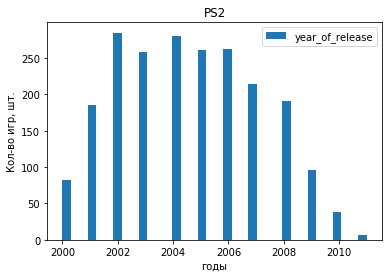

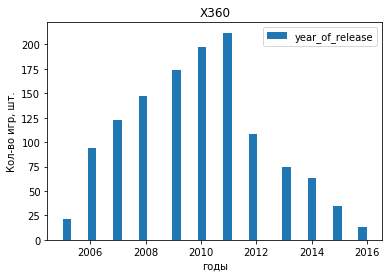

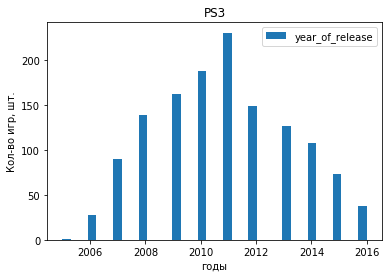

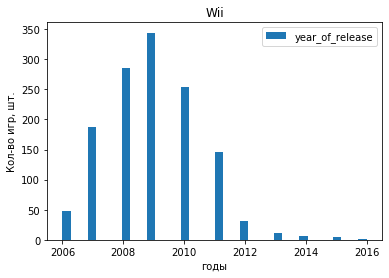

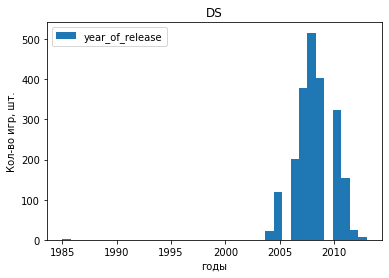

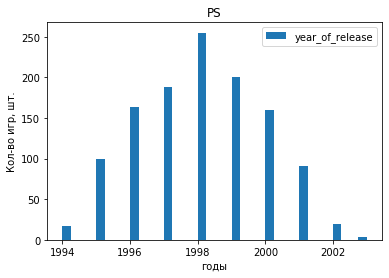

In [18]:
main_platf = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for name in main_platf:
    pl = games[games['platform'] == name]
    pl.plot(y='year_of_release', kind = 'hist', title = name, bins=36)
    plt.xlabel("годы")
    plt.ylabel("Кол-во игр, шт.")
    plt.show()


Построим гистограммы продаж игр по наиболее популярным платформам. Исходя из полученных графиков, можно увидеть, что жизненный цикл платформы, как источника дохода производителей игр, длится от 10 до 12 лет. После этого срока платформы морально устаревают и их должны сменить платформы нового поколения.

In [19]:
pl_games = games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')
platf_years = pl_games.groupby('platform')['year_of_release'].nunique().mean()
print(platf_years)

11.333333333333334


Рассчитаем среднюю продолжительность существования платформы. Для этого возьмем ранее выделенные наиболее популярные платформы. В пользу этого выбора говорит то, что указанные платформы набрали большой вес на рынке и при этом закончили свой жизненный цикл. Новые платформы брать нельзя, т.к. они только в начале своего пути. Платформы, которые существовали до 90-х годов 20 века также не показательны, т.к. уровень продаж тогда был достаточно низок.
Отдельно стоит сказать про персональные компьютеры. Это особая платформа. Компьютеры развиваются давно и сами по себе. Их нельзя сравнивать с приставками, т.к их жизненный цикл начался давно и закончится еще не скоро, что может исказить результат расчетов. 
Средняя продолжительность "жизни" платформы составила 11,3 года.

In [20]:
games = games[games.year_of_release >= 2012] # исключение строк со значениями year_of_release меньше 2012 года
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,1324.000000,1543.000000,2905.000000
mean,2013.908090,0.204403,0.175301,0.066410,0.053993,72.256798,6.639145,0.500107
std,1.412076,0.565062,0.503840,0.240857,0.164141,12.659704,1.567156,1.245457
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [21]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 16 to 16714
Data columns (total 12 columns):
name               2905 non-null object
platform           2905 non-null object
year_of_release    2905 non-null int64
genre              2905 non-null object
na_sales           2905 non-null float64
eu_sales           2905 non-null float64
jp_sales           2905 non-null float64
other_sales        2905 non-null float64
critic_score       1324 non-null float64
user_score         1543 non-null float64
rating             2905 non-null object
sum_sales          2905 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 295.0+ KB


Для дальнейшей работы с данными исключаем из массива данных строки с годами меньше 2012 г., как малоинформативные. Проверяем.

In [22]:
last_sales = games.groupby(['platform', games.loc[games['year_of_release']==2016, 'year_of_release']]).agg({'sum_sales': 'sum'})
last_sales.set_axis(['last_sales'],axis = 'columns',inplace = True)
last_sales

,,last_sales
platform,year_of_release,
3DS,2016.0,15.14
PC,2016.0,5.25
PS3,2016.0,3.60
PS4,2016.0,69.25
PSV,2016.0,4.25
Wii,2016.0,0.18
WiiU,2016.0,4.60
X360,2016.0,1.52
XOne,2016.0,26.15


Для определения тенденций продаж игр по платформам выделим суммы продаж игр по платформам, игры которых выходили в 2016 г. Таких оказалось всего 9.

In [23]:
result = games.groupby(['platform', 'year_of_release']).agg({'sum_sales': 'sum'}).reset_index() # определение суммарных продаж игр по годам в разбивке по платформам
res_games = result.groupby(['platform']).agg({'sum_sales': ['max', 'min']})
res_games.set_axis(['max', 'min'],axis = 'columns',inplace = True)
res_games

,max,min
platform,,
3DS,57.04,15.14
DS,11.67,1.54
PC,23.45,5.25
PS3,113.25,3.60
PS4,118.90,25.99
PSP,7.95,0.12
PSV,16.19,4.25
Wii,22.94,0.18
WiiU,22.03,4.60


Определим максимальные и минимальные суммы продаж игр по всем платформам в разбивке по годам выхода игр.

In [24]:
res_games = res_games.merge(last_sales, how='left', on = ['platform'])
res_games

,max,min,last_sales
platform,,,
3DS,57.04,15.14,15.14
DS,11.67,1.54,NaN
PC,23.45,5.25,5.25
PS3,113.25,3.60,3.60
PS4,118.90,25.99,69.25
PSP,7.95,0.12,NaN
PSV,16.19,4.25,4.25
Wii,22.94,0.18,0.18
WiiU,22.03,4.60,4.60


Объединим 2 вышеуказанные таблицы (res_games и last_sales(продажи игр, вышедших в 2016 г.)). 
Как видно из получившейся таблицы, по части платформ игры в 2016 г. не выходили, что указывает на моральное устаревание соответствующих платформ и уход их с рынка.

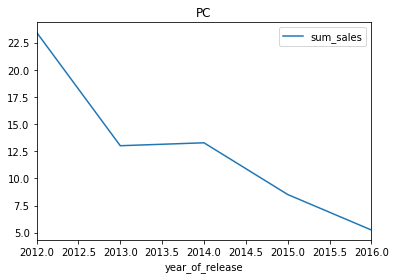

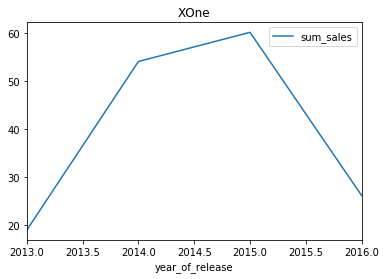

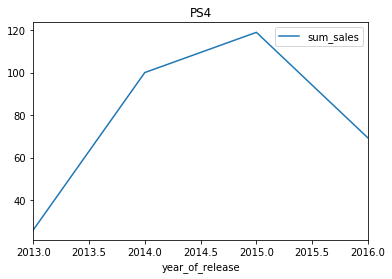

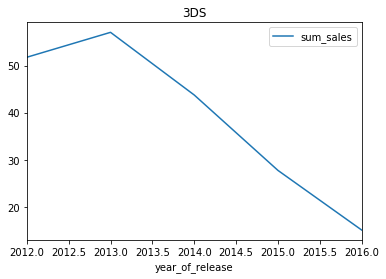

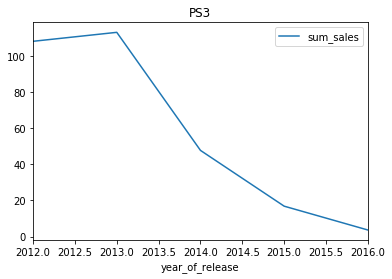

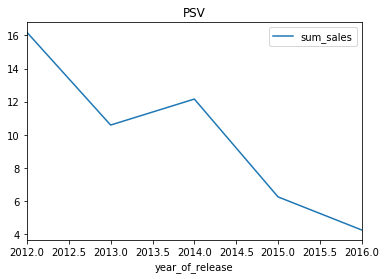

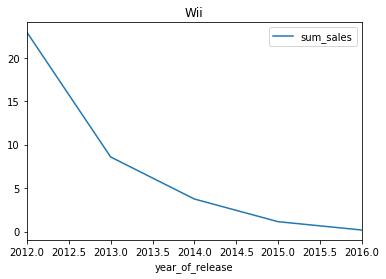

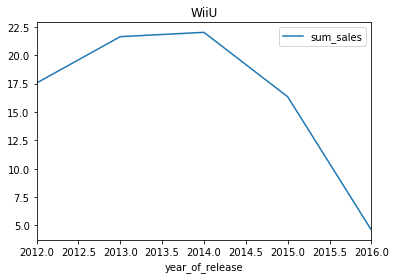

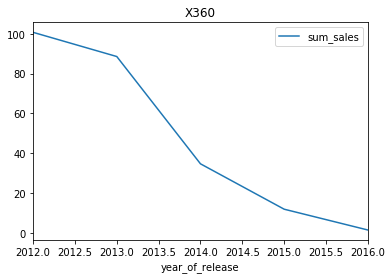

In [25]:
last_platf = ['PC', 'XOne', 'PS4', '3DS', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360']
for name in last_platf:
    pl = result[result['platform'] == name]
    pl.plot(x='year_of_release', y='sum_sales', kind = 'line', title = name)
    plt.show()

Построим распределения продаж по платформам в разбивке по годам.
Из графиков видно, что ряд платформ также морально устаревают (спад продаж длится на протяжении 2-х и более лет). Продажи игр по ним падают до минимальных значений, о чем свидетельствует также ранее сформированная таблица: значения столбца last_sales (продажи игр по платформе, вышедших в 2016 г.) равны соответствующим значениям из столбца min (минимальные продажи игр в год по платформе за историю наблюдений). К таким платформам относятся: 3DS, PS3, PSV, Wii, WiiU, X360. Хотя по указанным платформам игры еще выпускаются, но данные указывают на спад спроса на игры этих платформ и постепенный уход платформ с рынка.

В продажах игр платформ XOne и PS4 также наблюдается спад, но он однолетний и может объясняться тем, что игры указанных платформ еще не вышли на пик продаж в 2016 г. Данные платформы можно отнести к перспективным.

Отдельно следует рассмотреть платформу PC (персональные компьютеры), она появилась раньше игровых приставок и будет существовать еще много лет. Игровые приставки прихолят и уходят, а компьютеры сейчас есть у большинства населения развитых стран и используются они не только для работы, но и для игр. По данной платформе наблюдается спад, однако из графика видно, что подобные спады уже имели место и были преодолены. Так что, PC также стоит признать перспективной платформой.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2)

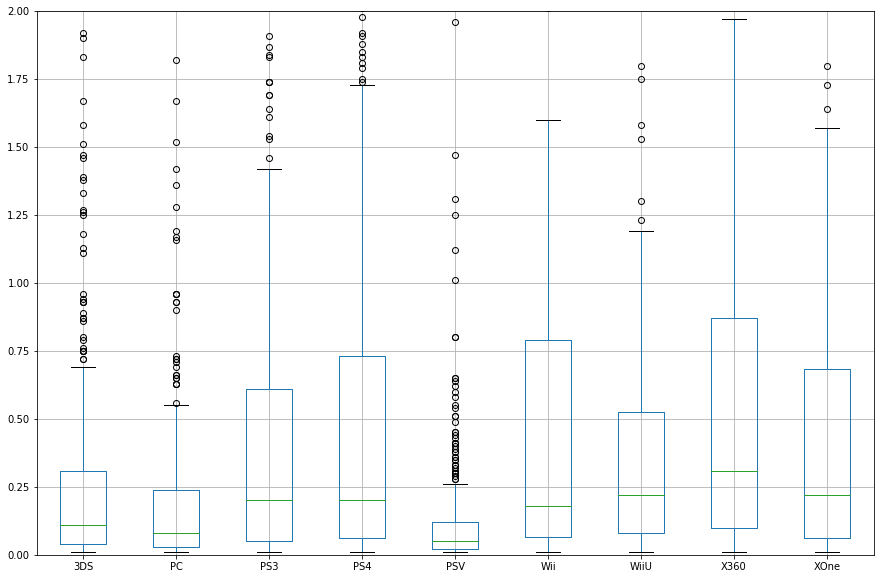

In [26]:
games_plt =games.query('platform in ["PC", "XOne", "PS4", "3DS", "PS3", "PSV", "Wii", "WiiU", "X360"]')
games_bp= games_plt.pivot_table(index = 'name', columns = 'platform', values = 'sum_sales', aggfunc = 'sum')
games_bp.boxplot(figsize = (15, 10))
plt.ylim(0, 2)

Построим диаграммы размаха для продаж игр по платформам, игры которых выпускались в 2016 г. Как видно из диаграмм, самые низкие сборы на и наименьший разброс сумм продаж наблюдаются у игр для PC и PSV, что, скорее всего, для PC обусловлено как возможностью скачать большинство игр для персональных компьютеров бесплатно (пиратские сайты, торренты и т.п.), так и более низкой ценой игр для PC по сравнению с конкурентами; для PSV - узким сегментом пользователей, т.к. PSV - это портатитвная приставка, в которую, в основном, играют тинэйджеры. 
У игровых приставок X360, XOne, PS3 и PS4 сборы и разброс доходов значительно выше по сравнению с остальными, также выше и разброс сумм продаж, что обусловлено мощными рекламными возможностями и более совершенной защитой игр указанных платформ от взлома.

In [27]:
xone_sales = games[games['platform'] == 'XOne']
xone_sales.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
484,Titanfall,XOne,2014,Shooter,1.84,0.80,0.04,0.27,86.0,6.4,M,2.95
6758,F1 2015,XOne,2015,Racing,0.08,0.15,0.00,0.02,64.0,5.3,E,0.25
9685,F1 2016 (Codemasters),XOne,2016,Racing,0.03,0.08,0.00,0.01,NaN,NaN,NR,0.12
9232,DmC: Devil May Cry,XOne,2015,Action,0.08,0.04,0.00,0.01,NaN,NaN,NR,0.13
1904,Forza Horizon 3,XOne,2016,Racing,0.42,0.58,0.00,0.08,91.0,7.4,E,1.08


Выделим из общей таблицы данные по платформе XOne. Проверяем.

In [28]:
xone_sales[['sum_sales','critic_score', 'user_score']].corr() # построение матрицы корреляций

,sum_sales,critic_score,user_score
sum_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


XOne


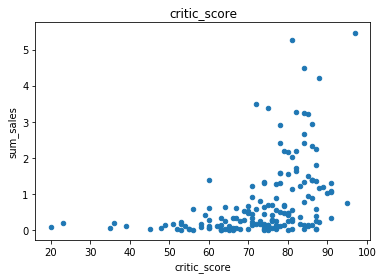

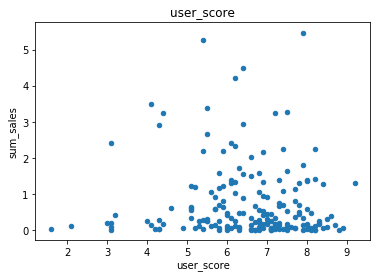

In [29]:
print('XOne')
xone_sales.plot(x='critic_score', y='sum_sales', kind = 'scatter', title = 'critic_score')
plt.show()
xone_sales.plot(x='user_score', y='sum_sales', kind = 'scatter', title = 'user_score')
plt.show()

В целях изучения взаимосвязи между продажами игр для платформы XOne с одной стророны и отзывами критиков и пользователей с другой стороны рассчитаем матрицу корреляций между указанными показателями и построим соответствующие диаграммы рассеяния.
Исходя из полученных результатов, видно, что между продажами игр и рейтингом критиков существует средняя по тесноте прямая зависимость (т.е. чем выше отзывы критиков, тем выше продажи), а между продажами игр и рейтингом взаимосвязь практически отсутствует. 
Полученные результаты свидетельствуют о том, что критики лучше разбираются в предпочтениях пользователей, чем сами пользователи. Видимо, значительная часть пользователей либо дают отзывы, не покупая игр (пиратский контент, обмен и т.п.), либо покупают игры не для себя (например: для детей). 

PC
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.240570   -0.120339
critic_score   0.240570      1.000000    0.431879
user_score    -0.120339      0.431879    1.000000


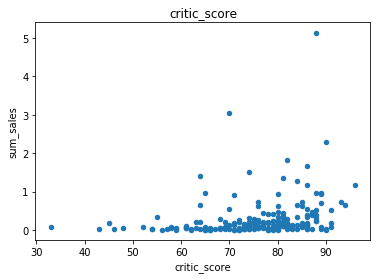

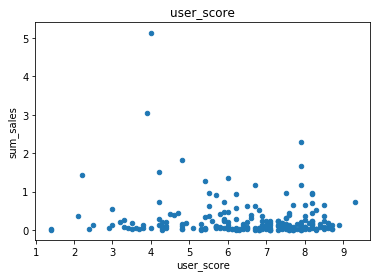

PS4
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.406568   -0.031957
critic_score   0.406568      1.000000    0.557654
user_score    -0.031957      0.557654    1.000000


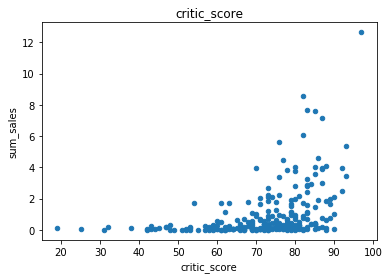

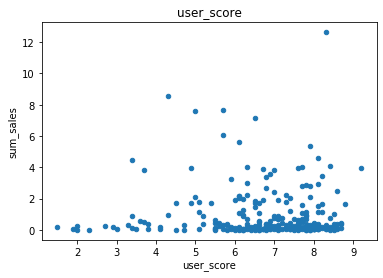

3DS
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.323378    0.203735
critic_score   0.323378      1.000000    0.722184
user_score     0.203735      0.722184    1.000000


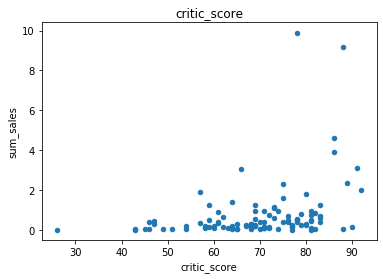

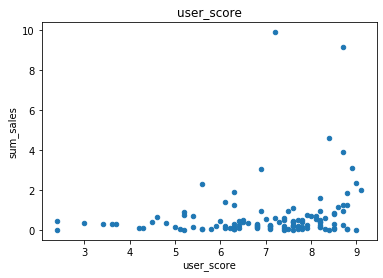

PS3
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.331371   -0.005043
critic_score   0.331371      1.000000    0.539525
user_score    -0.005043      0.539525    1.000000


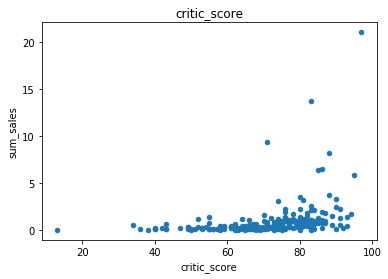

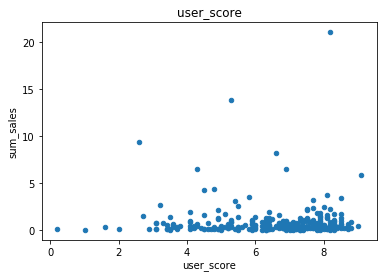

PSV
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.094466   -0.004230
critic_score   0.094466      1.000000    0.697889
user_score    -0.004230      0.697889    1.000000


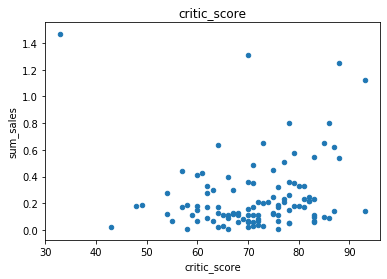

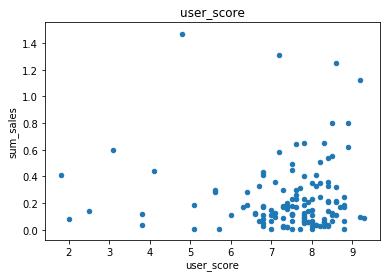

Wii
              sum_sales  critic_score  user_score
sum_sales      1.000000     -0.405997    0.277542
critic_score  -0.405997      1.000000    0.780222
user_score     0.277542      0.780222    1.000000


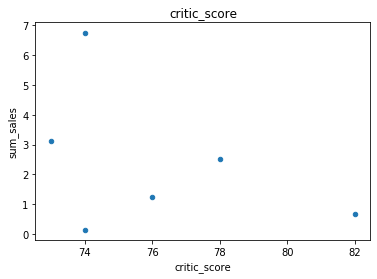

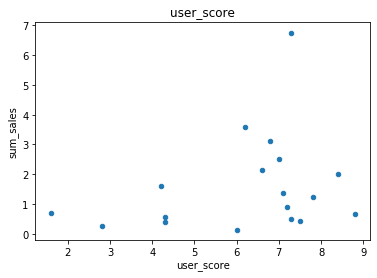

WiiU
              sum_sales  critic_score  user_score
sum_sales      1.000000       0.34838    0.400219
critic_score   0.348380       1.00000    0.770080
user_score     0.400219       0.77008    1.000000


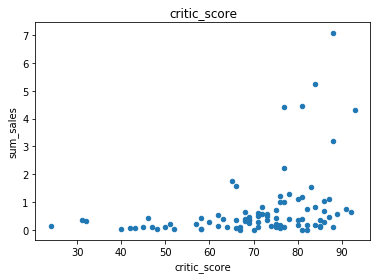

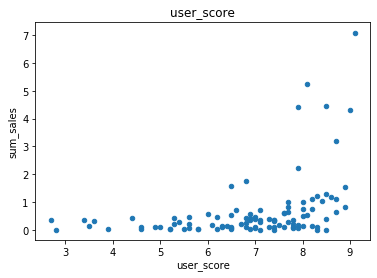

X360
              sum_sales  critic_score  user_score
sum_sales      1.000000      0.360266    0.006315
critic_score   0.360266      1.000000    0.557952
user_score     0.006315      0.557952    1.000000


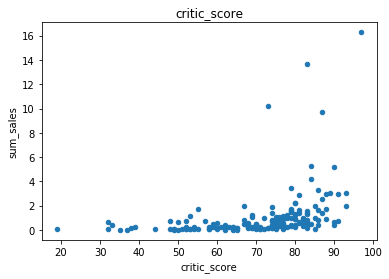

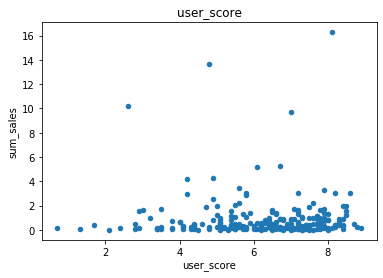

In [30]:
l_platf = ['PC', 'PS4', '3DS', 'PS3', 'PSV', 'Wii', 'WiiU', 'X360']
for name in l_platf:
    pc_sales = games[games['platform'] == name]
    print(name)
    print(pc_sales[['sum_sales','critic_score', 'user_score']].corr())
    pc_sales.plot(x='critic_score', y='sum_sales', kind = 'scatter', title = 'critic_score')
    pc_sales.plot(x='user_score', y='sum_sales', kind = 'scatter', title = 'user_score')
    plt.show()

Выделим из общей таблицы данные по платформам, игры которых выпускались в 2016 г.: PC, PS4, 3DS, PS3, PSV, Wii, WiiU, X360. Рассчитаем по ним матрицы корреляций и построим аналогичные диаграммы рассеяния. Выводы, сделанные по платформе XOne, подтверждаются. Критики разбираются в играх лучше пользователей. Исключение - только платформа WiiU. 

In [31]:
genres_games = games.groupby(['genre']).agg({'sum_sales': ['sum', 'count', 'mean']})
genres_games.set_axis(['sum', 'count', 'mean'],axis = 'columns',inplace = True)
genres_games = genres_games.sort_values(by = 'sum', ascending = False)
genres_games

,sum,count,mean
genre,,,
Action,446.41,1041,0.428828
Shooter,304.82,238,1.280756
Role-Playing,193.09,372,0.519059
Sports,181.07,268,0.675634
Misc,85.28,193,0.441865
Platform,61.00,85,0.717647
Racing,53.59,116,0.461983
Fighting,44.49,109,0.408165
Simulation,35.31,81,0.435926


Рассмотрим распределение игр по жанрам. Если брать общую сумму продаж, то лидерами являются жанры Action, Shooter и Role-Playing а аутсайдерами Adventure, Strategy, Puzzle.

In [32]:
genres_games = genres_games.sort_values(by = 'mean', ascending = False)
genres_games

,sum,count,mean
genre,,,
Shooter,304.82,238,1.280756
Platform,61.00,85,0.717647
Sports,181.07,268,0.675634
Role-Playing,193.09,372,0.519059
Racing,53.59,116,0.461983
Misc,85.28,193,0.441865
Simulation,35.31,81,0.435926
Action,446.41,1041,0.428828
Fighting,44.49,109,0.408165


Если рассматривать сумму продаж в расчете на 1 игру, ситуация с лидерами меняется. Лидеры здесь Shooter, Platform и Sports, а аутсайдеры остались прежними. Таким образом, можно сказать, что существуют жанры с высокими и низкими продажами.
Очевидно, что игры жанров Action, Sports и Shooter ориентированы в основном на молодежь мужского пола, их разработка в основном ориентирована на зрелищности. Игры-платформеры (аркады) ориентированы, в основном на детей.
Если мы поставим целью вложиться в создание успешной игры и получить быстрый результат, то лучше вкладываться в шутеры, игры про спорт или платформеры, где важна зрелищность, а сюжет не важен. 

## 4. Портрет пользователя каждого региона

In [33]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in sales:
    print(region)
    print((games.groupby('platform')[region].sum() / games[region].sum()*100).sort_values(ascending = False).head())
    print('')

na_sales
platform
X360    23.673353
PS4     18.312872
PS3     17.470823
XOne    15.682312
3DS      9.409050
Name: na_sales, dtype: float64

eu_sales
platform
PS4     27.705449
PS3     21.064310
X360    14.705940
XOne    10.130584
3DS      8.414335
Name: eu_sales, dtype: float64

jp_sales
platform
3DS     45.521460
PS3     18.292557
PSV     10.942360
PS4      8.272859
WiiU     6.743728
Name: jp_sales, dtype: float64



na_sales


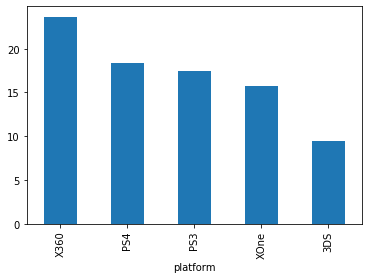

eu_sales


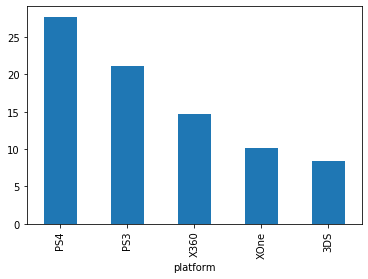

jp_sales


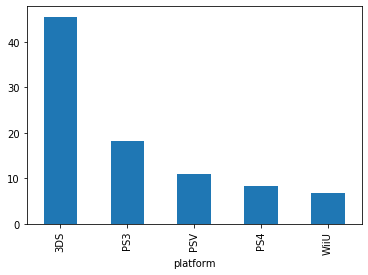

In [34]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in sales:
    print(region)
    (games.groupby('platform')[region].sum() / games[region].sum()*100).sort_values(ascending = False).head().plot(x='platform', kind = 'bar')
    plt.show()

Рассмотрим самые популярные платформы в каждом из регионов на основе доли доходов от продажи игр по кадой платформе. В Северной Америке наиболее популярные платформы X360 (Microsoft Xbox360 - производитель компания из США), PS4, PS3, XOne и 3DS. В Европейском Союзе в лидерах те же платформы, только на первых местах PS4 и PS3. В Японии в лидерах исключительно игры платформ японского производства 3DS, PS3, PSV, PS4, Wii.
Интересно, что в каждом регионе есть явный лидер: в США - XBox360, в Европе - Sony PlayStation4, в Японии - портативная 3DS.
Рассматривая каждиую платфрму в отдельности можно отметить следующие особенности:
Явными лидерами в рассматриваемых регионах является PS4 и PS3 (доли в Севрной Америке - 18,3% и 17,5%, в Европе - 27,7% и 21,1%, в Японии - 8,3% и 18,3% соответственно). 
За ними следует 3DS (доли в Севрной Америке - 9,4%, в Европе - 8,4%, в Японии - 45,5%)
Из оставшихся платформ больше ни одна не представлена в топ-5 во всех 3-х регионах.
Стоит также отметить X360 и XOne, которые занимают ведущие места в Америке и Европе (X360 - 23,7% и 14,7%, XOne - 15.7% и 10,1% соответственно).
Также можно сделать вывод о том, что Европа и Америка тяготеют к стационарным игровым платформам (т.е. люди играют только дома или в гостях), Япония - в большей степени, к портативными приставкам, т.е. люди играют везде (дома, в транспорте, на прогулках и т.п.).

In [35]:
for region in sales:
    print(region)
    print(games.groupby('genre')[region].sum().sort_values(ascending = False).head())
    print('')

na_sales
genre
Action          180.15
Shooter         144.83
Sports           81.53
Role-Playing     64.11
Misc             38.19
Name: na_sales, dtype: float64

eu_sales
genre
Action          161.70
Shooter         113.49
Sports           69.09
Role-Playing     48.58
Racing           27.29
Name: eu_sales, dtype: float64

jp_sales
genre
Role-Playing    65.54
Action          52.80
Misc            13.10
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64



na_sales


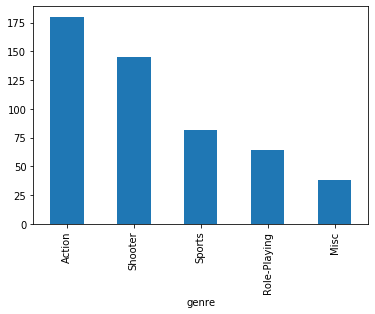

eu_sales


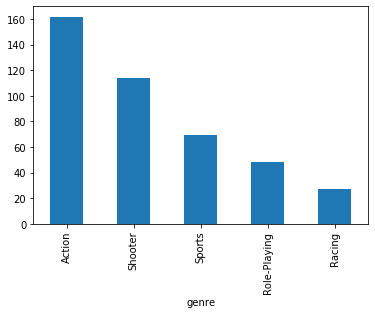

jp_sales


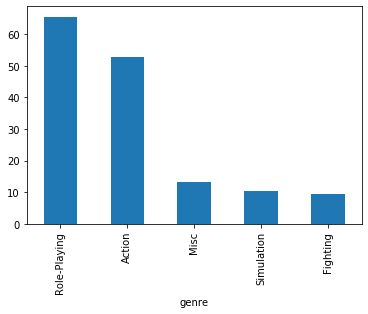

In [36]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in sales:
    print(region)
    games.groupby('genre')[region].sum().sort_values(ascending = False).head().plot(x='genre', kind = 'bar')
    plt.show()

Рассмотрим самые популярные жанры игр в каждом из регионов. В Северной Америке и Европе наиболее популярны экшены, стрелялки, игры про спорт, ролевые и прочие в Америке, гонки - в Нвропе, в Японии в топе с большим отрывом ролевые игры, затем идут экшены, прочие, симуляторы и драки (файтинги).
Разница между Америкой и Европой с одной стороны и Японией с другой обусловлена различием культур, а также средним возрастом населения. Европа и Америка - культуры сформированные европейцами (экстравертами), Япония - моноэтническая культура, замкнутая на себя (интроверты). 
Кроме того, на выбор жанров накладывает отпечаток возраст игроков. Судя по топу жанров, в Америке и Европе в игры играет, в основном подростки и молодежь: в избранных жанрах мало мысли, много действия и эффектов. В Японии, видимо, в игры играют и зрелые люди и молодежь: наряду с экшенами и спортом присутствуют ролевые игры, где надо думать. 

In [37]:
for region in sales:
    print(region)
    print((games.groupby('rating')[region].sum()/ games[region].sum()*100).sort_values(ascending = False))
    print('')

na_sales
rating
M       39.015477
E       19.281227
NR      17.398407
E10+    13.137641
T       11.167248
Name: na_sales, dtype: float64

eu_sales
rating
M       38.181640
E       22.199313
NR      17.967599
E10+    11.242023
T       10.409426
Name: eu_sales, dtype: float64

jp_sales
rating
NR      56.557122
E       14.684843
T       13.523740
M       10.989011
E10+     4.245283
Name: jp_sales, dtype: float64



na_sales


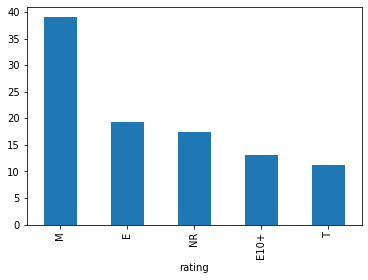

eu_sales


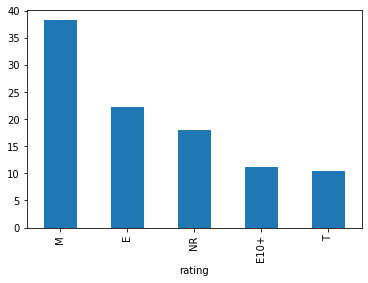

jp_sales


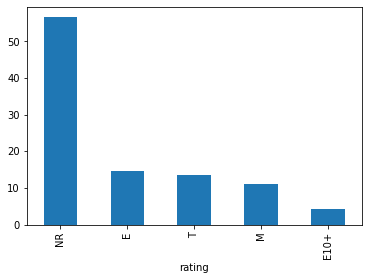

In [38]:
sales = ['na_sales', 'eu_sales', 'jp_sales']
for region in sales:
    print(region)
    (games.groupby('rating')[region].sum()/ games[region].sum()*100).sort_values(ascending = False).plot(x='rating', kind = 'bar')
    plt.show()

Рассмотрим распределение продаж игр в зависимости от рейтингов игр ESRB в каждом из регионов. Если рассматривать присвоенные рейтинги, то можно заметить, что в лидерах продаж в каждом из регионов: игры для взрослых (М), игры для всех (Е), игры для тинэйджеров (Т)  и т.п. 
Тем не менее, нужно также рассмотреть всю совокупность игр, в том числе игры, которым рейтинг не присвоен. Продажи таких игр в Америке и Европе составляют 17.4% и 17.9%, а в Японии - 56.6%. 
Таким образом, можно сделать вывод о том, что рейтинг ESRB оказывает влияние на продажи игр в Европе и Северной Америке, а в Японии - нет.

## 5. Проверка гипотез

Проверим гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

#### Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [39]:
data_xone = games.query('platform == "XOne"')
data_xone = data_xone.dropna(subset = ['user_score'])# удаление строк с пропусками в переменной user_score
data_xone.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15456,Carmageddon: Max Damage,XOne,2016,Action,0.01,0.01,0.0,0.00,52.0,7.1,M,0.02
6492,Project CARS,XOne,2015,Racing,0.11,0.13,0.0,0.02,81.0,5.8,E,0.26
12061,Dynasty Warriors 8: Empires,XOne,2014,Action,0.04,0.02,0.0,0.01,58.0,6.8,T,0.07
493,Call of Duty: Ghosts,XOne,2013,Shooter,1.88,0.77,0.0,0.27,78.0,4.3,M,2.92
4481,Borderlands: The Handsome Collection,XOne,2015,Shooter,0.26,0.13,0.0,0.04,80.0,7.8,M,0.43


In [40]:
data_pc = games.query('platform == "PC"')
data_pc = data_pc.dropna(subset = ['user_score'])# удаление строк с пропусками в переменной user_score
data_pc.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
15046,Final Fantasy XIV: Heavensward,PC,2015,Action,0.01,0.01,0.0,0.00,86.0,7.7,T,0.02
16518,Rugby World Cup 2015,PC,2015,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
4693,Tom Clancy's The Division,PC,2016,Shooter,0.22,0.15,0.0,0.04,79.0,5.8,M,0.41
15235,Street Fighter X Tekken,PC,2012,Fighting,0.00,0.02,0.0,0.00,79.0,6.4,T,0.02
8251,The Secret World,PC,2012,Role-Playing,0.07,0.08,0.0,0.02,74.0,8.2,M,0.17


Выделяем массивы данных по платформам Xbox One и PC. Удаляем пропуски в пользовательских рейтингах. Проверяем.

In [41]:
from scipy import stats as st
import numpy as np
alpha = 0.05 # задаем критический уровень статистической значимости
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние рейтинги платформ Xbox One и PC не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние рейтинги платформ Xbox One и PC могут быть равны.")

p-значение: 0.6252774522173157
Не отвергаем нулевую гипотезу. Средние рейтинги платформ Xbox One и PC могут быть равны.


Исследование показало, что средние пользовательские рейтинги платформ Xbox One и PC могут быть равны. Нулевая гипотеза не отвергнута.

Проверим гипотезу о неравенстве средних пользовательских рейтингов жанров Action и Sports.

#### Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports не равны.

In [42]:
data_action = games.query('genre == "Action"')
data_action = data_action.dropna(subset = ['user_score'])# удаление строк с пропусками в переменной user_score
data_action.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
2451,Darksiders II,PS3,2012,Action,0.35,0.35,0.01,0.14,84.0,7.1,M,0.85
10026,Disney Art Academy,3DS,2016,Action,0.02,0.01,0.08,0.00,72.0,6.8,E,0.11
6275,The Evil Within,PC,2014,Action,0.10,0.16,0.00,0.02,68.0,5.9,M,0.28
915,Batman: Arkham Origins,X360,2013,Action,1.15,0.56,0.00,0.17,74.0,7.5,T,1.88
8763,Darksiders II,PC,2012,Action,0.03,0.10,0.00,0.02,81.0,7.8,M,0.15


In [43]:
data_sport = games.query('genre == "Sports"')
data_sport = data_sport.dropna(subset = ['user_score'])# удаление строк с пропусками в переменной user_score
data_sport.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
6955,NBA Live 15,PS4,2014,Sports,0.16,0.04,0.0,0.04,59.0,5.6,E,0.24
3061,NHL 13,X360,2012,Sports,0.51,0.10,0.0,0.05,83.0,6.6,E10+,0.66
10358,MLB 14: The Show,PSV,2014,Sports,0.08,0.00,0.0,0.03,68.0,7.0,E,0.11
14162,Tour de France 2014,PS4,2014,Sports,0.00,0.03,0.0,0.00,53.0,5.1,E,0.03
3150,Football Manager 2014,PC,2013,Sports,0.00,0.60,0.0,0.03,85.0,5.5,E,0.63


Выделяем массивы данных по жанрам Action и Sports. Удаляем пропуски в пользовательских рейтингах. Проверяем.

In [44]:
from scipy import stats as st
import numpy as np
alpha = 0.05 # задаем критический уровень статистической значимости
results = st.ttest_ind(data_action['user_score'], data_sport['user_score'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports могут быть равны.")

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу. Средние рейтинги жанров Action и Sports не равны.


Исследование показало, что средние пользовательские рейтинги жанров Action и Sports не равны. Нулевая гипотеза отвергнута.

## 6. Общий вывод

Исходя из проведенного исследования можно сделать следующте выводы:
1. Производство видеоигр с 2009 г. имеет тенденцию к снижению. С одной стороны, снижается конкуренция, с другой - за внимание пользователей в основном борятся крупные компании. Снижение продаж игр, скорее всего, обусловлено экономическим кризисом, начавшимся в 2008 г. В условиях кризиса многие потребители отказываются от излишеств (в данном случае это игры) или переходят на бесплатный или пиратский контент. Немаловажным фактором снижения спроса на видеоигры стали игры на телефонах и планшетах, которые также вытеснили значительный процент игр с рынка. Скорее всего, тенденция к снижению спроса на видеоигры продолжится. 
2. Для успешной продажи видеоигр необходимо определить перспективные платформы, на которых игры будут выходить. Цикл жизни платформы для видеоигр колеблется от 10 до 12 лет. Соответственно, нужно определить современные платформы крупных фирм, которые были запущены в производство относительно недавно. Таким условиям соответствуют 2 платформы: XBox One и Sony PlayStation4. Продажи игр указанных платформ будут расти в ближайшие 2 года (исходя из цикла жизни платформ), т.к. на указнных платформах будут выходить самые современные и зрелищные игры, затем начнется постепенный спад продаж, связанный с моральным устареванием платформ. Отдельно стоит выделить платформу Персональных компьютеров, спрос на игры которой остается устойчивым на протяжении многих лет. Данный спрос обусловлен повсеместной распространенностью компьютеров. Персональные компьютеры также следует признать перспективной платформой.
3. При прогнозировании продаж конкретных игр следует в большей степени полагаться на мнение профессиональных критиков, чем на мнение пользователей, которые сами не знают чего хотят.
4. Также при продаже игр следует ориентироваться на жанры. Лучше всего продаются стрелялки, платформеры и игры про спорт.
5. При рассмотрении продаж в регионах, следует отметить, что в Северной Америке и Европе популярны мощные стационарные игровые приставки, а в Японии рынок поделен между стационарными и портативными приставками.
6. Исходя из жанровых предпочтений пользователей можно сделать вывод, что в Европе и Северной Америке в игры играет в основном молодежь, а в Японии - практически все возрастные группы.
7. В Японии возрастной рейтинг игр не стльно влияет на объемы продаж, тогда как в остальных двух регионах влияние возрастного рейтинга существенно.

Соответственно, при планировании рекламного бюджета нам нужно ориентироваться на игры платформ XOne, PS4 и PC с высокими рейтингами от профессиональных критиков с приоритетными жанрами стрелялки, платформеры и игры про спорт. В Европе и Северной Америке реклама должна быть нацелена на молодежную аудиторию, в Японии - на все возрастные группы. Также в рекламе игр в Европе и Северной Америке должна присутствовать информация о возрастном рейтинге, в Японии -нет.